# INTRODUCTION
I know that everyone has thought about how to choose perfect hyperparameters for ann algorithms.GridSearchCV is beneficial exactly for this.Maybe you have heard that gridsearchcv is used for machine learning algorithms.We also use it for ann.

<font color ='blue'>
Content:
    
1. [Import Libraries](#1)<br>
1. [Load and Check Data](#2)<br>
1. [Normalization and Train_Test_Split](#3)<br>
1. [Visualization of Data](#4)<br>
1. [Install to scikeras](#5)<br>
    * [Why do we use to KerasRegressor ?](#6)<br>
    * [Scikeras and tf.keras.wrappers.scikit_learn](#7)<br>
    * [What are the different function on scikeras kerasregressor?](#8)<br>
1. [Create and Fit the Model](#9)<br>
1. [Score and Best Parameters](#10)<br>
1. [Confusion Matrix](#11)<br>
1. [Outcomes](#12)<br>

In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
import sys
sys.stderr = open('nul', 'w')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raisin-binary-classification/Raisin_Dataset.xlsx
/kaggle/input/raisin-binary-classification/Raisin_Dataset.csv


<a id = '1'></a>
# Import Libraries
Raisin dataset was used in this notebook because we will make a ann model with binary_crosentropy so we have to use dataset that has a binary class.

In [39]:
data=pd.read_csv("/kaggle/input/raisin-binary-classification/Raisin_Dataset.csv")
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


<a id = '2'></a>
# Load and Check Data

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [41]:
data["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [42]:
y=data.Class.values
x=data.drop(["Class"],axis=1)
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)


<a id = '3'></a>
# Normalization and Train_Test_Split

In [43]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)



<a id = '4'></a>
# Visualization of Data

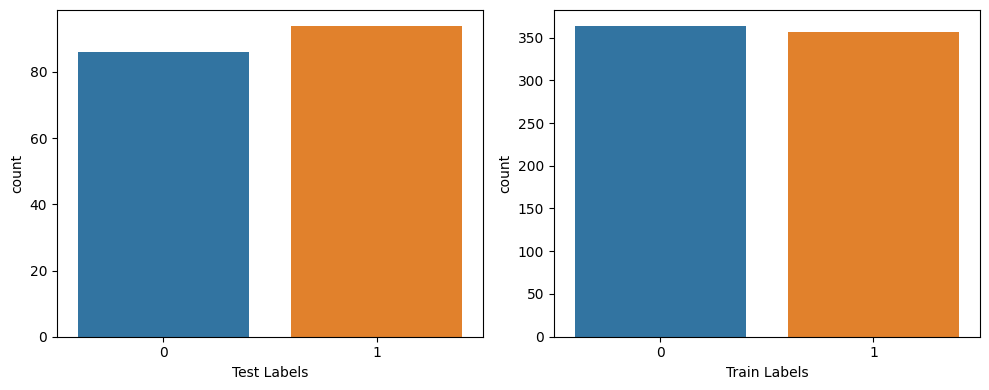

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) 
y_test_series = pd.Series(y_test, name="Test Labels")
sns.countplot(x=y_test_series,ax=ax1)
y_train_series = pd.Series(y_train, name="Train Labels")
sns.countplot(x=y_train_series,ax=ax2)
plt.tight_layout() 
plt.show()

<a id = '5'></a>
# Install to scikeras

In [46]:
!pip install scikeras

<a id = '6'></a>
## Why do we use to KerasRegressor ?
In normally,gridsearchcv model is used with sklearn models for the machine learning algorithms but we will use a sequential model for ann so we have to fix our model for useing with gridsearchcv.There is a function for this from scikeras.

<a id = '7'></a>
## Scikeras and tf.keras.wrappers.scikit_learn
In the past,we used to kerasregressor from keras.wrappers but anymore there is a new library for kerasregressor.New version of keras don't support keras wrappers.So we have to use scikeras library.

<a id = '8'></a>
## What are the different function on scikeras kerasregressor?
In the past,when we made a dictionary about param grid we wrote just names of the functions.However right now,when will make a dictionary about param grid we have to define to the name of the model. 

<a id = '9'></a>
# Create and Fit the Model

In [47]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix




def create_model(optimizer ,activation, hidden_units,hidden_units1):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_dim=(x_train.shape[1])))
    model.add(Dense(hidden_units1, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = KerasRegressor(model=create_model, verbose=0)
ann_param_grid = {'model__optimizer': ['adam', 'rmsprop'],
                  'model__activation': ['relu', 'sigmoid'],
                  'model__hidden_units': [32,64,128],
                  'model__hidden_units1': [16,32,64],
                  'epochs': [100],
                  'batch_size':[16,32]}

grid_search = GridSearchCV(estimator=model, param_grid=ann_param_grid, cv=StratifiedKFold(n_splits = 4), n_jobs=-1, verbose=0)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

<a id = '10'></a>
# Score and Best Parameters

In [48]:
a=grid_search.best_estimator_
print("Test Accuracy\n", accuracy)
print("Best Estimators\n", a)

Test Accuracy
 0.8666666666666667
Best Estimators
 KerasRegressor(
	model=<function create_model at 0x7cac04603c70>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=16
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	model__activation=relu
	model__hidden_units=128
	model__hidden_units1=16
	model__optimizer=rmsprop
)


<a id = '11'></a>
# Confusion Matrix

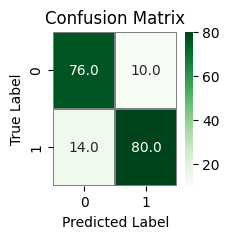

In [50]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


<a id = '12'></a>
# Outcomes
GridSearchCV function is very beneficial in hyperparameter selection. Everything may change over time, but we have to learn every new development.